In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set()

In [2]:
df = pd.read_csv("Dataset/movie_metadata.csv")
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
df.shape

(5043, 28)

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# !pip install pandas-profiling[notebook] # or conda install -c conda-forge pandas-profiling

In [6]:
from pandas_profiling import ProfileReport

In [7]:
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile

In [8]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols,categorical_cols

(['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'],
 ['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'])

In [9]:
df[numeric_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
df[categorical_cols].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,The Fast and the Furious,John Heard,based on novel,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


#### remove duplicated rows

from profile ,data contains 45 duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(4998, 28)

#### remove missing values

In [12]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
df.color.value_counts(),df.color.isnull().sum()

(Color               4772
  Black and White     207
 Name: color, dtype: int64,
 19)

In [15]:
df.color = SimpleImputer(strategy="most_frequent").fit_transform(df.color.values.reshape(-1,1))
df.color.value_counts(),df.color.isnull().sum(),df.color.unique()

(Color               4791
  Black and White     207
 Name: color, dtype: int64,
 0,
 array(['Color', ' Black and White'], dtype=object))

In [16]:
df.director_name.value_counts(),df.director_name.isnull().sum()

(Steven Spielberg    26
 Woody Allen         22
 Martin Scorsese     20
 Clint Eastwood      20
 Ridley Scott        17
                     ..
 Ed Decter            1
 Norman Ferguson      1
 Mars Callahan        1
 Edward Hall          1
 Michael Anderson     1
 Name: director_name, Length: 2398, dtype: int64,
 103)

In [17]:
df.director_name.nunique(),df.director_name.isnull().sum()

(2398, 103)

number of unique values 2398,very high so (can't use most freq or mean ) so we'll just drop missing values rows

In [18]:
df.dropna(axis=0,subset=['director_name'],inplace=True)
df.director_name.isnull().sum()

0

In [19]:
df.num_critic_for_reviews.nunique(),df.num_critic_for_reviews.isnull().sum()

(528, 44)

<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='Density'>

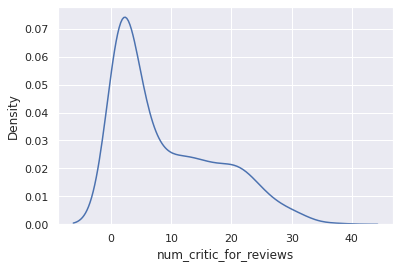

In [20]:
sns.kdeplot(df.num_critic_for_reviews.value_counts())

In [21]:
#replace it with it's median value
df.num_critic_for_reviews = SimpleImputer(strategy="median").fit_transform(df.num_critic_for_reviews.values.reshape(-1,1))
df.num_critic_for_reviews.value_counts(),df.num_critic_for_reviews.isnull().sum(),df.num_critic_for_reviews.nunique()

(112.0    72
 1.0      37
 81.0     32
 5.0      32
 16.0     32
          ..
 409.0     1
 533.0     1
 642.0     1
 585.0     1
 775.0     1
 Name: num_critic_for_reviews, Length: 528, dtype: int64,
 0,
 528)

In [22]:
df.duration.value_counts(),df.duration.nunique(),df.duration.isnull().sum()

(90.0     160
 100.0    139
 101.0    136
 98.0     135
 97.0     131
         ... 
 225.0      1
 330.0      1
 280.0      1
 25.0       1
 325.0      1
 Name: duration, Length: 173, dtype: int64,
 173,
 13)

In [23]:
#replace it with it's mean value
df.duration = SimpleImputer(strategy="mean").fit_transform(df.duration.values.reshape(-1,1))
df.duration.isnull().sum(),df.duration.nunique()

(0, 174)

<AxesSubplot:xlabel='director_facebook_likes', ylabel='Density'>

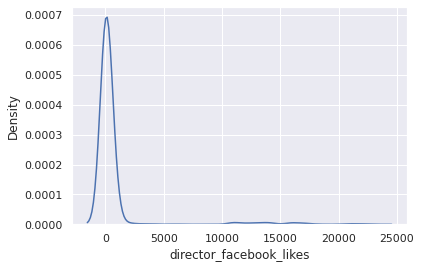

In [24]:
sns.kdeplot(df.director_facebook_likes)

In [25]:
#fill value 0
df.director_facebook_likes = SimpleImputer(strategy="constant",fill_value=0).fit_transform(df.director_facebook_likes.values.reshape(-1,1))
df.director_facebook_likes.isnull().sum()

0

In [26]:
fill_mean = ['actor_1_facebook_likes','gross','budget','num_user_for_reviews','aspect_ratio','actor_2_facebook_likes']
df[fill_mean] = SimpleImputer(strategy="mean").fit_transform(df[fill_mean])

In [27]:
fill_median = ['title_year','facenumber_in_poster']
df[fill_median] = SimpleImputer(strategy="median").fit_transform(df[fill_median])

In [28]:
fill_most_frequent= ['content_rating']
df[fill_most_frequent] = SimpleImputer(strategy="most_frequent").fit_transform(df[fill_most_frequent])

In [29]:
fill_zeros = ['actor_3_facebook_likes']
df[fill_zeros] = SimpleImputer(strategy="constant",fill_value=0).fit_transform(df[fill_zeros])

In [30]:
drop_missing =  ['language','country','actor_1_name']
df.dropna(axis=0,subset=drop_missing,inplace=True)

In [31]:
drop_cols = ['movie_title','actor_3_name','movie_imdb_link','actor_2_name']
df.drop(drop_cols, axis=1,inplace=True)

In [32]:
# dataset.plot_keywords
df.dropna(subset=['plot_keywords'],axis=0,inplace=True)
df['plot_keywords'].isnull().sum()

0

In [33]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [34]:
df_target = df['imdb_score']
df.drop(['imdb_score'],axis=1,inplace=True)
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
df_numeric = df[numeric_cols].copy()
df_categorical = df[categorical_cols].copy()


### Categorical Attributes

In [35]:
genres = df_categorical.genres
genres.value_counts()

Drama                                          213
Comedy                                         189
Comedy|Drama|Romance                           182
Comedy|Drama                                   181
Comedy|Romance                                 149
                                              ... 
Biography|Documentary|History                    1
Adventure|Comedy|Drama|Romance|Thriller|War      1
Action|Drama|Romance|Sport                       1
Comedy|Family|Music|Musical                      1
Action|Adventure|Fantasy|Horror                  1
Name: genres, Length: 879, dtype: int64

In [36]:
len(genres.values)

4737

In [37]:
generes_types = []
list(map(lambda x: [generes_types.append(_) for _ in x.split("|")],genres.values))
generes_types = list(set(generes_types))
print(generes_types)

['Musical', 'War', 'History', 'Sci-Fi', 'Comedy', 'Romance', 'Action', 'Film-Noir', 'Short', 'Thriller', 'Sport', 'Family', 'Adventure', 'Horror', 'Music', 'Fantasy', 'Crime', 'News', 'Animation', 'Drama', 'Western', 'Mystery', 'Biography', 'Documentary']


In [38]:
generes_data = np.zeros((len(generes_types),df_categorical.shape[0]))

In [39]:
dict_generes= {}
for type_,data_ in zip(generes_types,generes_data):
    dict_generes[type_] = data_

In [40]:
for iteration,val in enumerate(genres.values):
    for type_ in val.split("|"):
        dict_generes[type_][iteration] = 1.0

In [41]:
generes_df = pd.DataFrame(dict_generes)

In [42]:
#let's check our code
def test_(x,y):
    for i in x.split("|"):
        assert y[i] == 1
test_(df.genres.values[0],generes_df.iloc[0])

In [43]:
df_categorical

,color,director_name,genres,actor_1_name,plot_keywords,language,country,content_rating
0,Color,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar|future|marine|native|paraplegic,English,USA,PG-13
1,Color,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13
2,Color,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13
3,Color,Christopher Nolan,Action|Thriller,Tom Hardy,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13
5,Color,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13
...,...,...,...,...,...,...,...,...
5035,Color,Robert Rodriguez,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,assassin|death|guitar|gun|mariachi,Spanish,USA,R
5036,Color,Anthony Vallone,Crime|Drama,Richard Jewell,jewell|mongol|nostradamus|stepnicka|vallone,English,USA,PG-13
5037,Color,Edward Burns,Comedy|Drama,Kerry Bishé,written and directed by cast member,English,USA,Not Rated
5038,Color,Scott Smith,Comedy|Drama,Eric Mabius,fraud|postal worker|prison|theft|trial,English,Canada,R


In [44]:
print(generes_df.shape)
print(df_categorical.shape)

(4737, 24)
(4737, 8)


In [45]:
df_categorical.index = range(0,df_categorical.shape[0])
generes_df.index = range(0,generes_df.shape[0])

In [46]:
df_categorical =  pd.concat([df_categorical, generes_df],axis=1)
df_categorical

,color,director_name,genres,actor_1_name,plot_keywords,language,country,content_rating,Musical,War,...,Music,Fantasy,Crime,News,Animation,Drama,Western,Mystery,Biography,Documentary
0,Color,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,avatar|future|marine|native|paraplegic,English,USA,PG-13,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Color,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Color,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Color,Christopher Nolan,Action|Thriller,Tom Hardy,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Color,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,Color,Robert Rodriguez,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,assassin|death|guitar|gun|mariachi,Spanish,USA,R,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4733,Color,Anthony Vallone,Crime|Drama,Richard Jewell,jewell|mongol|nostradamus|stepnicka|vallone,English,USA,PG-13,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4734,Color,Edward Burns,Comedy|Drama,Kerry Bishé,written and directed by cast member,English,USA,Not Rated,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4735,Color,Scott Smith,Comedy|Drama,Eric Mabius,fraud|postal worker|prison|theft|trial,English,Canada,R,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
df_categorical.drop(['genres'],axis=1,inplace=True)

In [48]:
df_categorical.plot_keywords.values

array(['avatar|future|marine|native|paraplegic',
       'goddess|marriage ceremony|marriage proposal|pirate|singapore',
       'bomb|espionage|sequel|spy|terrorist', ...,
       'written and directed by cast member',
       'fraud|postal worker|prison|theft|trial',
       'actress name in title|crush|date|four word title|video camera'],
      dtype=object)

In [49]:
#general function of genre feature implementation
def read_list_cats(dataset,feature_name,splitter='|',drop_first=True,pca=False,pca_k=2):

    '''
    Params:
            dataset: DataFrame contains all features
            feature_name : specific feature which each row like Comedy|Adv|Horror..
            drop_first: OneHotEncoder without first column
    return:
            Copied of dataset with new feautre and removed original feature
            
    Expected:
            dataset[feature_name] has not any missing values
    '''
    dataset = dataset.copy()
    feature = []
    list(map(lambda x: [feature.append(_) for _ in x.split("|")],dataset[feature_name].values))
    # check if new feature has same name of old feature,append feature_name
    feature_types = list(set(feature))
    feature_types = [feature_name +" " + name for name in feature_types]
    feature_data = np.zeros((len(feature_types),dataset.shape[0]))
    dict_feature = {}
    for type_,data_ in zip(feature_types,feature_data):
        dict_feature[type_] = data_
    for iteration,val in enumerate(dataset[feature_name].values):
        for type_ in val.split(splitter):
            dict_feature[feature_name +" "+ type_][iteration] = 1.0
            
    #let's check our code
    def test_(x,y):
        for i in x.split(splitter):
            assert y[feature_name + " " + i] == 1
    df_feature = pd.DataFrame(dict_feature)        
    test_(dataset[feature_name].values[0],df_feature.iloc[0])
    
    if(drop_first):
        df_feature.drop([df_feature.columns.values[0]], axis=1,inplace=True)
        
    if(pca):
        try:
            from sklearn.decomposition import PCA
            k = pca_k
            pca_dec = PCA(n_components=k)
            column_name = [feature_name + str(feat_id) for feat_id in range(0,k)] 
            df_feature = pd.DataFrame(pca_dec.fit_transform(df_feature),columns=column_name)
        except Exception as e:
            print("PCA Error")
    
    dataset.index = range(0,dataset.shape[0])
    df_feature.index = range(0,df_feature.shape[0])
    dataset =  pd.concat([dataset, df_feature],axis=1)
    return dataset

In [50]:
df_categorical.columns,df_categorical.shape
df_categorical

,color,director_name,actor_1_name,plot_keywords,language,country,content_rating,Musical,War,History,...,Music,Fantasy,Crime,News,Animation,Drama,Western,Mystery,Biography,Documentary
0,Color,James Cameron,CCH Pounder,avatar|future|marine|native|paraplegic,English,USA,PG-13,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Color,Gore Verbinski,Johnny Depp,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Color,Sam Mendes,Christoph Waltz,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Color,Christopher Nolan,Tom Hardy,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Color,Andrew Stanton,Daryl Sabara,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,Color,Robert Rodriguez,Carlos Gallardo,assassin|death|guitar|gun|mariachi,Spanish,USA,R,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4733,Color,Anthony Vallone,Richard Jewell,jewell|mongol|nostradamus|stepnicka|vallone,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4734,Color,Edward Burns,Kerry Bishé,written and directed by cast member,English,USA,Not Rated,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4735,Color,Scott Smith,Eric Mabius,fraud|postal worker|prison|theft|trial,English,Canada,R,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
df_categorical = read_list_cats(df_categorical,"plot_keywords",drop_first=True,pca=False)
df_categorical

,color,director_name,actor_1_name,plot_keywords,language,country,content_rating,Musical,War,History,...,plot_keywords horse penis,plot_keywords talking mouse,plot_keywords boston marathon,plot_keywords smuggling,plot_keywords business,plot_keywords birding,plot_keywords electronic devices,plot_keywords fatal attraction,plot_keywords power exchange,plot_keywords obscenity
0,Color,James Cameron,CCH Pounder,avatar|future|marine|native|paraplegic,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Color,Gore Verbinski,Johnny Depp,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Color,Sam Mendes,Christoph Waltz,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Color,Christopher Nolan,Tom Hardy,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Color,Andrew Stanton,Daryl Sabara,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,Color,Robert Rodriguez,Carlos Gallardo,assassin|death|guitar|gun|mariachi,Spanish,USA,R,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4733,Color,Anthony Vallone,Richard Jewell,jewell|mongol|nostradamus|stepnicka|vallone,English,USA,PG-13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4734,Color,Edward Burns,Kerry Bishé,written and directed by cast member,English,USA,Not Rated,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4735,Color,Scott Smith,Eric Mabius,fraud|postal worker|prison|theft|trial,English,Canada,R,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### remaining categorical features to onehot

In [52]:
# pd.get_dummies(dataset[df_categorical],drop_first=True)
cats_attrs = [col for col in df_categorical.columns if df_categorical[col].dtype == 'object']
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
onehot_data = pd.DataFrame(onehot.fit_transform(df_categorical[cats_attrs]))
df_categorical.index = range(0,df_categorical.shape[0])
onehot_data.index = range(0,onehot_data.shape[0])
df_categorical =  pd.concat([df_categorical, onehot_data],axis=1)
df_categorical.drop(cats_attrs,axis=1,inplace=True)
df_categorical

,Musical,War,History,Sci-Fi,Comedy,Romance,Action,Film-Noir,Short,Thriller,...,8971,8972,8973,8974,8975,8976,8977,8978,8979,8980
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4734,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### PCA for categorical features
we have 16963 columns , so i'll use PCA

In [53]:
from functools import reduce
try:
    from sklearn.decomposition import PCA    
    pca_dec = PCA(n_components=2) 
    pca_dec.fit(df_categorical)   
    print(f'Sum Variance :{reduce(lambda x,y:x+y ,pca_dec.explained_variance_ratio_)}')
    print(f'Variance :{pca_dec.explained_variance_ratio_}')
    df_categorical = pd.DataFrame(pca_dec.fit_transform(df_categorical))
except Exception as e:
    print("PCA Error")

Sum Variance :0.0787276600193359
Variance :[0.04382672 0.03490094]


In [54]:
# sum_,idx = 0,0
# for i,val in enumerate(pca_dec.explained_variance_ratio_):
#     sum_ += val
#     if(sum_ > 0.9):
#         idx = i
#         break
# print(sum_)
# print(idx)

In [55]:
df_categorical

,0,1
0,1.016898,1.235385
1,0.957649,0.992784
2,0.317353,1.364044
3,0.228369,1.110645
4,0.880819,1.164349
...,...,...
4732,-1.125122,0.263594
4733,-0.005193,-0.080824
4734,0.256028,-0.663396
4735,-0.462187,-0.763062


### Numerical Attributes

In [56]:
from sklearn.preprocessing import StandardScaler
df_numeric = pd.DataFrame(StandardScaler().fit_transform(df_numeric),columns=df_numeric.columns)
df_numeric

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,4.771526,3.070727,-0.247414,0.116575,-0.387536,11.257602,5.681710,-0.285787,-0.676018,7.230914,0.972525,0.549760,-0.187739,-0.491273,1.281076
1,1.291690,2.672936,-0.049993,0.202847,2.223060,4.121866,2.730109,2.107370,-0.676018,2.490700,1.284637,0.387791,0.797962,0.328235,-0.395216
2,3.771383,1.744757,-0.247414,-0.296342,0.281847,2.392434,1.340655,0.091808,-0.178148,1.853799,1.012158,1.035665,-0.319441,0.328235,3.922505
3,5.515434,2.451941,7.467071,13.292424,1.352861,6.316306,7.517698,5.319566,-0.676018,6.309496,1.036929,0.792712,5.163763,0.328235,7.935445
4,2.614193,1.037572,-0.080851,-0.076794,-0.411634,0.383244,0.887841,-0.448627,-0.178148,1.185575,1.104801,0.792712,-0.261472,0.328235,0.823905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,-0.741659,-1.216578,-0.247414,-0.388564,-0.446375,-0.740148,-0.251229,-0.543548,-0.676018,-0.401457,-0.201576,-0.826973,-0.409910,-1.080744,-0.395216
4733,-0.278783,-1.083981,-0.246713,-0.390944,-0.451462,-0.007442,-0.621218,-0.546518,-0.676018,-0.738179,-0.201595,0.225823,-0.404089,0.010407,-0.395013
4734,-1.088816,-0.597791,-0.247414,-0.313001,-0.434661,-0.772360,-0.611957,-0.513686,-0.178148,-0.704246,-0.201566,0.711728,-0.365039,0.010407,-0.374237
4735,-1.196269,-0.951384,-0.246713,-0.202930,-0.411835,-0.007442,-0.617000,-0.426079,0.319721,-0.725128,-0.004416,0.873697,-0.300765,0.010407,-0.390949


In [57]:
# np.isfinite(df_numeric[df_numeric.columns.values]).all()
np.isnan(df_numeric[df_numeric.columns.values]).any()
np.isinf(df_numeric[df_numeric.columns.values]).any()

num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_1_facebook_likes       False
gross                        False
num_voted_users              False
cast_total_facebook_likes    False
facenumber_in_poster         False
num_user_for_reviews         False
budget                       False
title_year                   False
actor_2_facebook_likes       False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

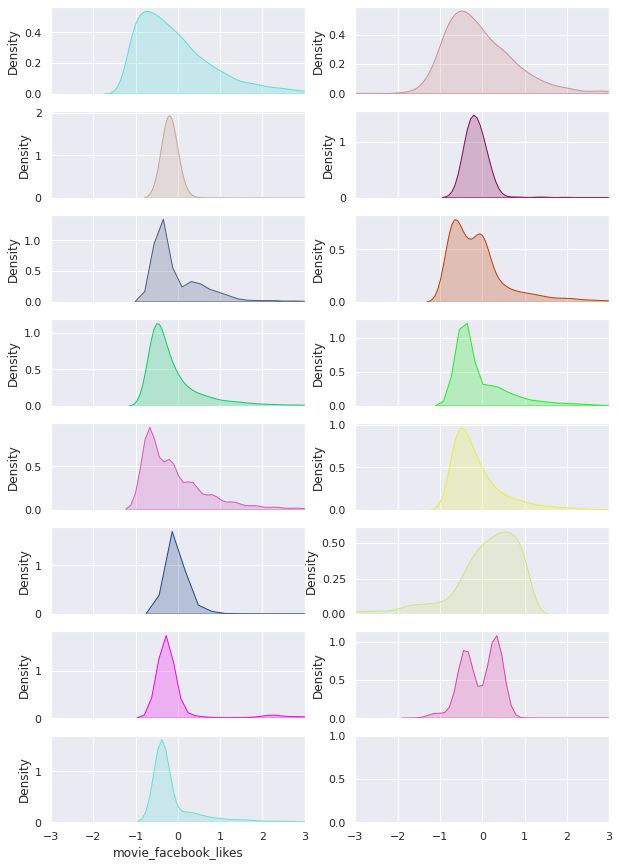

In [58]:
import math
num_of_features = len(df_numeric.columns)   
f, axes = plt.subplots(math.ceil(num_of_features/2),2, figsize=(10, 15), sharex=True)
ax = 0
plt.xlim(-3,3)
for feature_id in range(num_of_features):
    sns.kdeplot(df_numeric[df_numeric.columns[feature_id]],shade=True,color=np.random.rand(3,),ax=axes[(feature_id//2),ax])
    ax = 1 - ax

### Outliers not too much
let's combine numeric and categorical data

In [59]:
df_categorical.index = range(0,df_categorical.shape[0])
df_numeric.index = range(0,df_numeric.shape[0])
dataset =  pd.concat([df_categorical, df_numeric],axis=1)

In [60]:
dataset

,0,1,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,1.016898,1.235385,4.771526,3.070727,-0.247414,0.116575,-0.387536,11.257602,5.681710,-0.285787,-0.676018,7.230914,0.972525,0.549760,-0.187739,-0.491273,1.281076
1,0.957649,0.992784,1.291690,2.672936,-0.049993,0.202847,2.223060,4.121866,2.730109,2.107370,-0.676018,2.490700,1.284637,0.387791,0.797962,0.328235,-0.395216
2,0.317353,1.364044,3.771383,1.744757,-0.247414,-0.296342,0.281847,2.392434,1.340655,0.091808,-0.178148,1.853799,1.012158,1.035665,-0.319441,0.328235,3.922505
3,0.228369,1.110645,5.515434,2.451941,7.467071,13.292424,1.352861,6.316306,7.517698,5.319566,-0.676018,6.309496,1.036929,0.792712,5.163763,0.328235,7.935445
4,0.880819,1.164349,2.614193,1.037572,-0.080851,-0.076794,-0.411634,0.383244,0.887841,-0.448627,-0.178148,1.185575,1.104801,0.792712,-0.261472,0.328235,0.823905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,-1.125122,0.263594,-0.741659,-1.216578,-0.247414,-0.388564,-0.446375,-0.740148,-0.251229,-0.543548,-0.676018,-0.401457,-0.201576,-0.826973,-0.409910,-1.080744,-0.395216
4733,-0.005193,-0.080824,-0.278783,-1.083981,-0.246713,-0.390944,-0.451462,-0.007442,-0.621218,-0.546518,-0.676018,-0.738179,-0.201595,0.225823,-0.404089,0.010407,-0.395013
4734,0.256028,-0.663396,-1.088816,-0.597791,-0.247414,-0.313001,-0.434661,-0.772360,-0.611957,-0.513686,-0.178148,-0.704246,-0.201566,0.711728,-0.365039,0.010407,-0.374237
4735,-0.462187,-0.763062,-1.196269,-0.951384,-0.246713,-0.202930,-0.411835,-0.007442,-0.617000,-0.426079,0.319721,-0.725128,-0.004416,0.873697,-0.300765,0.010407,-0.390949


### Split data

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,df_target,test_size=0.2)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3789, 17), (948, 17), (3789,), (948,))

### Model

In [63]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(n_estimators = 500,tree_method='gpu_hist', gpu_id=0)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [64]:
results = xg_model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f'mean abs error :{mean_absolute_error(results, y_test.values)}') 
print(f'mean sq error :{mean_squared_error(results, y_test.values)}')

mean abs error :0.5346251898677038
mean sq error :0.5755116514022153


In [66]:
# from sklearn.ensemble import RandomForestRegressor
# rf_regressor = RandomForestRegressor(n_estimators = 500)
# rf_regressor.fit(X_train, y_train)
# rf_pred = rf_regressor.predict(X_test)
# mean_squared_error(rf_pred, y_test)

### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 4],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators' : [100, 500, 1000]
}
# Create a based model
model_xgb= xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   44.0s finished


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}

In [75]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [76]:
mean_squared_error(y_test.values, y_pred_xgb)

0.5116613267780451

### Save Model

In [79]:
import joblib

In [80]:
joblib.dump(grid_search_xgb.best_estimator_, "Models/xgb_cv_51.pkl")

['Models/xgb_cv_51.pkl']

### Loading model

In [ ]:
xgb_model = joblib.load("Models/xgb_cv_51.pkl")
xgb_model